In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout
from keras.models import Sequential
from keras.utils import to_categorical

/home/ankitmb125/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

MemoryError: 

In [4]:
labels = train.pop('label')

In [5]:
labels = to_categorical(labels)

In [6]:
train = train.values

In [7]:
train = np.array([np.reshape(i, (28,28)) for i in train])

In [8]:
train = train/255

In [9]:
train.shape

(27455, 28, 28)

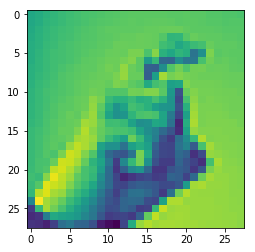

In [11]:
plt.imshow(train[25])

In [20]:
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.3, random_state = 41)

In [21]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_val = X_val.reshape(X_val.shape[0], 28,28,1)

In [33]:
y_train.shape

(19218, 25)

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(8, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())
model.add(Dense(156, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(104, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(25, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 156)               62556     
_________________________________________________________________
dropout_3 (Dropout)          (None, 156)               0         
__________

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=512)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 6s 310us/step - loss: 3.0983 - acc: 0.0942 - val_loss: 2.7418 - val_acc: 0.2378
Epoch 2/50
19218/19218 [==============================] - 5s 258us/step - loss: 2.3085 - acc: 0.3001 - val_loss: 1.6431 - val_acc: 0.5519
Epoch 3/50
19218/19218 [==============================] - 5s 250us/step - loss: 1.5709 - acc: 0.4941 - val_loss: 1.0991 - val_acc: 0.6910
Epoch 4/50
19218/19218 [==============================] - 6s 293us/step - loss: 1.1613 - acc: 0.6198 - val_loss: 0.7683 - val_acc: 0.7926
Epoch 5/50
19218/19218 [==============================] - 6s 298us/step - loss: 0.8999 - acc: 0.7045 - val_loss: 0.5727 - val_acc: 0.8440
Epoch 6/50
19218/19218 [==============================] - 7s 352us/step - loss: 0.7066 - acc: 0.7652 - val_loss: 0.4412 - val_acc: 0.8780
Epoch 7/50
19218/19218 [==============================] - 5s 268us/step - loss: 0.5690 - acc: 0.8141 - val_loss: 0.3322 - v

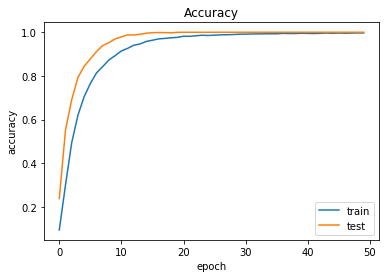

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [2]:
y_test = test.pop('label')
y_test = to_categorical(y_test)
y_test.shape
y_test.head(5)

NameError: name 'y_test' is not defined

In [ ]:
X_test = test.values
X_test = np.array([np.reshape(i, (28,28)) for i in X_test])
X_test = X_test / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
X_test.shape

In [ ]:
predictions = model.predict(X_test)

In [ ]:
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Test accuracy: ", test_accuracy)